<a href="https://colab.research.google.com/github/nredick/code-playground/blob/main/KNNxMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to image-based classification with the K-Nearest Neighbors (KNN) algorithm**

> *You can use the connect button to connect to a local or hosted runtime: hosted runtime runs on a new machine instance in Google Cloud, local runtime runs on your machine*







We'll be using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), the "hello world" of machine learning datasets. The MNIST dataset is a database of 70,000 handwritten digits [0-9] that are 28 x 28 pixels values (0-255). 

Supervised learning padradigmes work well for training models on the MNIST set. 

In [50]:
## imports 
!pip install numpy
!pip install pandas
!pip install matplotlib

# imports for sklearn 
from sklearn import neighbors 
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

# import to be able to save and load model 
import pickle

# helper libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
import math

Now we import the MNIST dataset, which (luckily for us) is built into Keras. 

Loading the dataset gives us four NumPy arrays. X_train and y_train comprise the *training set* that the KNN model will train on and x_test and y_test comprise the *test set* that the model will be evaluated against. 

It is also common to have a third set of data, called a *validation set*, which is used to determine whether a model's hyperparameters shouldbe tuned before final testing, but a train and test set will be sufficient for this model. 

The x_train/x_test arrays contain 28x28 2D feature arrays/matrices in which each 'slot' holds a pixel value ranging from 0 to 255, representing the image. They can also be imagined as a 784-dimensional feature vectors. 

The y_train/y_test arrays contain the *labels* for each of the image matrices in the x-arrays. Each 'slot' holds an integer value from 0-9. 

In [36]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualising the data

Shape of x_train:  (60000, 28, 28) 
Shape of y_train:  (60000,)
Number of labels:  60000


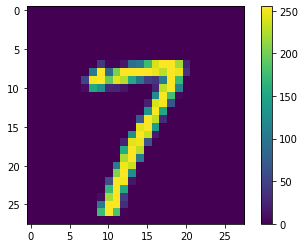

In [37]:
# the shape of our image arrays x_train and x_test
print("Shape of x_train: ", x_train.shape, "\nShape of y_train: ", y_train.shape)

# the number of labels for each set 
print("Number of labels: ", len(x_train))

# visualise a random image from the training data
plt.figure()
plt.imshow(x_train[randrange(len(x_train-1))])
plt.colorbar()
plt.grid(False)
plt.show()

# Data preprocessing

Notice that the image is not grayscale. We want to scale the pixel values to be betweeen 0 and 1 before the model trains on them because colour is irrelevant to being able to identify the digit in the image.

This is a form of prerocessing that is common in image analysis. 

Unlike most data, the MNIST dataset is mostly preprocessed for us. Preprocessing is critical for training a good model, but is usually the most time and computationally expenseive part of the ML process.

Examples of image prepocessing include:

* Resizing images
* Colour to grayscale
* Noise removal, such as Gaussian blur
* Segmentation

In [38]:
# scale the pixel values of each image to grayscale by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

Now our data looks like this: 

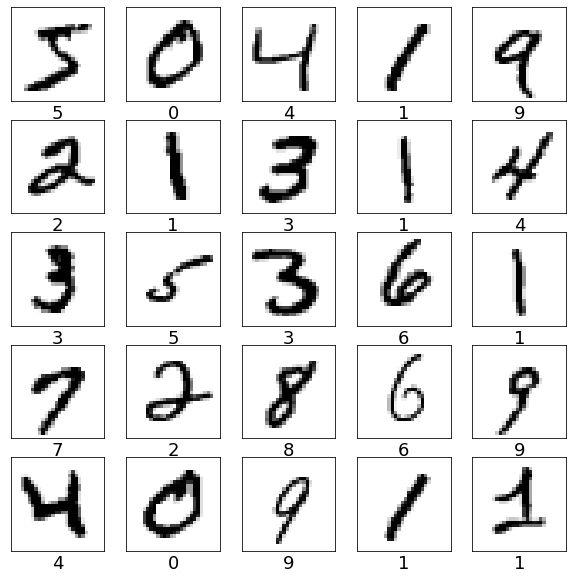

In [39]:
# show the first 10 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray_r")
    plt.xlabel(y_train[i], fontsize=18)
plt.show()

# Implementation of a KNN with cross-fold validation without the sklearn library

This code is just for reference. 

[Source - MAIS202](https://tiny.cc/mais202-knn-mnist2)

```
# import the mnist data set from keras 
from tensorflow.keras.datasets import mnist 

# load the mnist data into our variables 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape the 3D arrays to 2D arrays by flattening the images from 28x28 matrices to 1x784 arrays 
X_train = np.reshape(X_train, (-1, 784)) 
X_test = np.reshape(X_test, (-1, 784)) 

# define a function to perform cross-validation folds 
def cv_fold(X_train_folds, y_train_folds, X_valid_fold, y_valid_fold, k):
  correct_count = 0

  for valid_idx, valid_image in enumerate(X_valid_fold):
    distances = []
    for train_image in X_train_folds:
      # compute the euclidean dist/l2 norm between two images 
      distance = np.linalg.norm(valid_image - train_image)
      distances.append(distance)
      
    for i in range(k):
      min_index = np.argmin(distances)
      neighbour_indices.append(min_index)
      distances[min_index] = np.Inf

    neighbour_labels = y_train_folds[neighbour_indices]
    prediction = np.argmin(neighbour_labels)
    if prediction.shape == 1:
      prediction = np.random.choice(prediction)
    if prediction == y_valid_fold[valid_idx]:
      correct_count += 1

  accuracy = correct_count / X_valid_fold.shape[0] * 100 

  return accuracy

def cross_validate(k, num_folds=5):
  increment = X_train.shape[0] // num_folds
  fold_accuracies = []

  for i in range(num_folds):
    X_valid_fold = X_train[i*increment:(i+1)*increment]
    y_valid_fold = y_train[i*increment:(i+1)*increment]
    X_train_folds = np.delete(X_train, np.s_[i*increment:(i+1)*increment], axis=0)
    y_train_folds = np.delete(y_train, np.s_[i*increment:(i+1)*increment], axis=0)
    fold_accuracies.append(cv_fold(X_train_folds, y_train_folds,
                                   X_valid_fold, y_valid_fold, k))
    
  fold_accuracies = np.array(fold_accuracies)
  cv_accuracy = np.mean(fold_accuracies)

  print("K = {}, CV Accuracy: {}".format(cv_accuracy))

for k in [1,2,5,10]:
  cross_validate(k)

```

# Training the KNN model using the sklearn library 

While it's possible to implement the KNN model ourselves, the sci-kit learn library has already implemented it.

So then we just need to figure out an optimal k-value for this dataset. In general, the smaller k is, the tighter the “fit” of the model.

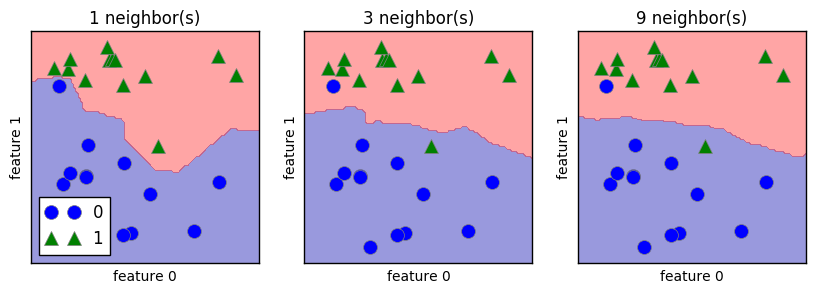

([Image Source](https://elvinouyang.github.io/assets/images/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_files/Introduction%20to%20Machine%20Learning%20with%20Python%20-%20Chapter%202%20-%20Datasets%20and%20kNN_31_1.png))

For this example, we're going to use Euclidean distance (L2 norm), like in the self-implemented example. Minkowski distance is the default for the sklearn implementation and some other distance metrics we could use are: 

*   Manhattan distance
*   Chebyshev distance 

(amongst others which can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric))

The sklearn.neighbors.KNeighborsClassifier has set [default parameters](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) so in theory we don't need to specifiy any, but we want to find our optimal k, and it can be good practice to see what parameters the model is using during training so that the code is more readable. 

In [40]:
# reshape the image arrays from 3D to 2D; flatten the images from 28x28 to 1x784 
# note that passing -1 as a value prompts np to imply the value for the first parameter based on the second parameter 
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# check out the new shape of the arrays 
print(f'New x_train shape: {x_train.shape}')

New x_train shape: (60000, 784)


Here's one way to try an figure out the optimal k value for the model: you can train separate models on different k values and compare each of their accuracies. 

```
# train multiple knns that classify inputs based on k neighbours using euclidean distance 
for k in [3, 5, 7]:
    print(f'Training a KNN for MNIST with k = {k}')
    knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    accuracy = cross_val_score(knn_classifier, x_train, y_train) # uses default cv
    print(f'Cross-validation accuracy for k = {k}: {accuracy}')
```

However, a KNN model takes a long time to train because it does not generalize any of the data, instead the model 'memorizes' it. It can consequently be classified as a non-parametric model: the number of parameters increases with the size of the training set. Which is why I'm not going to try and run this code. 

One way to generalize the optimal k value without training multiple models is to take the square root of n, where n is the total number of samples in the training set. 

In [ ]:
# approximate optimal k value by computing the integer square root
k = math.floor(math.sqrt(len(x_train)))

# now we can proceed to final training and testing of the model 
print(f'Training a KNN for MNIST with k = {k}')
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# fit the data to the model/train the model 
knn_classifier.fit(x_train, y_train)

In [ ]:
# save our model 
filename = 'final-model.sav'
final_model = pickle.dump(knn_classifier, open(filename, 'wb'))

Making predictions with the KNN can be time consuming because it makes predictions in O(n) time, wheres is trains in O(1) time. 

In [51]:
# make predictions on the test data and get accuracy 
#y_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Test accuracy for the final model: {accuracy}\n')
print(f'Classification report:\n{report}')

Test accuracy for the final model: 0.9241
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.82      1.00      0.90      1135
           2       0.99      0.84      0.91      1032
           3       0.93      0.94      0.94      1010
           4       0.96      0.90      0.93       982
           5       0.95      0.90      0.93       892
           6       0.95      0.97      0.96       958
           7       0.93      0.90      0.91      1028
           8       0.98      0.85      0.91       974
           9       0.87      0.94      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



# Using a confusion matrix to understand model outputs and success

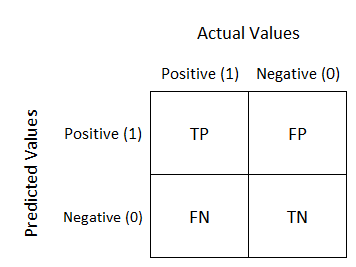

([Image Source](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62))

Confusion matrix:
[[ 965    1    0    0    0    4    9    1    0    0]
 [   0 1131    2    1    0    0    1    0    0    0]
 [  23   77  869    8    5    2    8   29   11    0]
 [   0   15    4  952    1    9    1   12    8    8]
 [   1   29    0    0  881    1   11    2    1   56]
 [   5   20    0   23    2  807   15    3    1   16]
 [  10    9    0    0    5    3  931    0    0    0]
 [   0   63    2    0    3    0    0  930    0   30]
 [  16   19    2   29   11   23    6   10  831   27]
 [  11   13    2    8    9    2    2   18    0  944]]


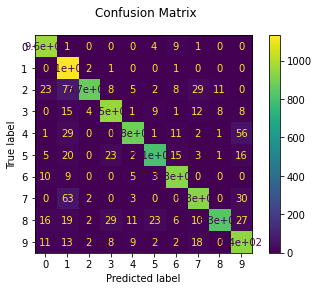

In [55]:
disp = plot_confusion_matrix(knn_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Loading the saved model and making predictions 

You can load the model and use it to make predictions, which is useful if you need to load the model elsewhere or at a different time. 

It is good practice to save your best model so that you don't have to train it again, especially for a model like a KNN that takes a long time to train. 

In [57]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9241


# Sources

[MNIST dataset](http://yann.lecun.com/exdb/mnist/)

McGill Artificial Intelligence Society Textbook 

[Distance metrics and K-Nearest Neighbor (KNN)](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4)

[Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)